# Power Sector Transition Capex Model  
## Estimating Investment Requirements

This notebook estimates the capital expenditure required to transition India's power sector towards a cleaner energy mix. The analysis translates capacity targets into approximate investment requirements using publicly available cost benchmarks.


In [3]:
import pandas as pd


In [4]:
total_capacity_gw = 510
current_renewable_gw = 245
current_thermal_gw = total_capacity_gw - current_renewable_gw

total_capacity_gw, current_renewable_gw, current_thermal_gw


(510, 245, 265)

In [5]:
target_renewable_share = 1.0  # 70% renewable target
target_renewable_gw = total_capacity_gw * target_renewable_share

additional_renewable_gw = target_renewable_gw - current_renewable_gw
additional_renewable_gw


265.0

## Cost Assumptions

Indicative capital costs used for estimation:
- Solar: USD 0.6 billion per GW
- Wind: USD 1.0 billion per GW

For simplicity, additional renewable capacity is assumed to be split evenly between solar and wind.


In [9]:
solar_cost_per_gw = 0.6
wind_cost_per_gw = 1.0

solar_additional_gw = additional_renewable_gw * 0.5
wind_additional_gw = additional_renewable_gw * 0.5

total_transition_capex = (
    solar_additional_gw * solar_cost_per_gw +
    wind_additional_gw * wind_cost_per_gw
)

total_transition_capex


212.0

## Financing Structure of Power Transition

In [10]:
# Financing assumptions
debt_ratio = 0.7
equity_ratio = 0.3

bank_debt_share = 0.4
green_bond_share = 0.3
dfi_share = 0.3

In [11]:
debt_amount = total_transition_capex * debt_ratio
equity_amount = total_transition_capex * equity_ratio

bank_debt = debt_amount * bank_debt_share
green_bonds = debt_amount * green_bond_share
dfi_loans = debt_amount * dfi_share

In [12]:
financing_df = pd.DataFrame({
    "Source": ["Equity", "Bank Debt", "Green Bonds", "DFI Loans"],
    "Amount": [equity_amount, bank_debt, green_bonds, dfi_loans]
})

financing_df


,Source,Amount
0,Equity,63.60
1,Bank Debt,59.36
2,Green Bonds,44.52
3,DFI Loans,44.52


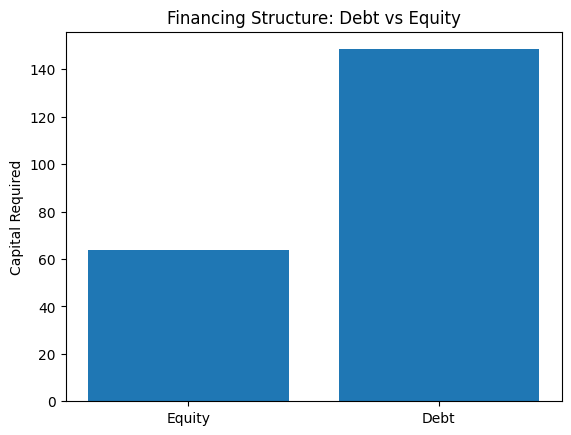

In [13]:
import matplotlib.pyplot as plt

labels = ['Equity', 'Debt']
values = [equity_amount, debt_amount]

plt.figure()
plt.bar(labels, values)
plt.title('Financing Structure: Debt vs Equity')
plt.ylabel('Capital Required')
plt.show()

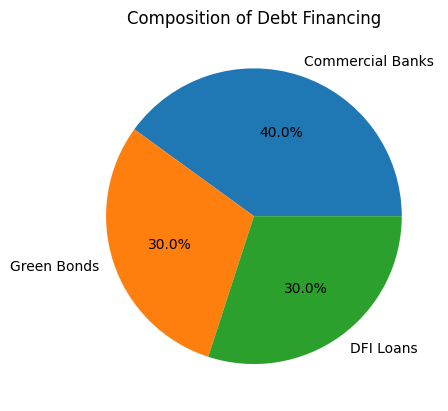

In [14]:
debt_labels = ['Commercial Banks', 'Green Bonds', 'DFI Loans']
debt_values = [bank_debt, green_bonds, dfi_loans]

plt.figure()
plt.pie(debt_values, labels=debt_labels, autopct='%1.1f%%')
plt.title('Composition of Debt Financing')
plt.show()

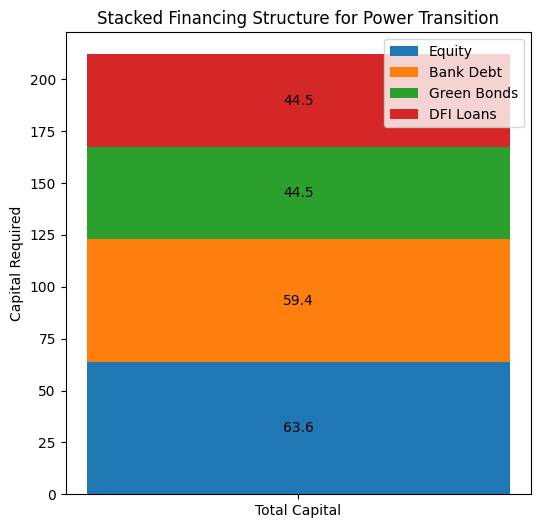

In [17]:
plt.figure(figsize=(6,6))

# Plot stacked bars
plt.bar('Total Capital', equity_amount, label='Equity')
plt.bar('Total Capital', bank_debt, bottom=equity_amount, label='Bank Debt')
plt.bar('Total Capital', green_bonds, 
        bottom=equity_amount + bank_debt, label='Green Bonds')
plt.bar('Total Capital', dfi_loans, 
        bottom=equity_amount + bank_debt + green_bonds, label='DFI Loans')

# Add text labels (centered in each stack)
plt.text(0, equity_amount/2, f'{equity_amount:.1f}', ha='center', va='center')
plt.text(0, equity_amount + bank_debt/2, f'{bank_debt:.1f}', ha='center', va='center')
plt.text(0, equity_amount + bank_debt + green_bonds/2, f'{green_bonds:.1f}', ha='center', va='center')
plt.text(0, equity_amount + bank_debt + green_bonds + dfi_loans/2, 
         f'{dfi_loans:.1f}', ha='center', va='center')

plt.ylabel('Capital Required')
plt.title('Stacked Financing Structure for Power Transition')
plt.legend()
plt.show()

### Key Insight
The power transition is predominantly debt-financed, underscoring the critical role of banks and capital markets in enabling decarbonisation at scale.
